In [1]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
import pandas as pd 
from sklearn import preprocessing
from classes.CustomTokenizer import CustomTokenizer
from classes.ModelBuilder import ModelBuilder
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from matplotlib import pyplot

labelEncoders = dict()
def labelEncoder(df, column, params = {}):    
    le = preprocessing.LabelEncoder()        
    le.fit(df[column])    
    column_encoded = le.transform(df[column])
    labelEncoders[column] = le
    return column_encoded

# get the dataset
def get_dataset():
    columns = ['Pregunta', 'Intencion']
    df_train = shuffle(pd.read_csv('data/train.csv', usecols=columns, sep='|'))
    
    df_train['Intencion_encoded'] = labelEncoder(df_train, 'Intencion')
    
    X = df_train['Pregunta'].values
    y = df_train['Intencion_encoded'].values
	#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    return X, y

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()	
	level0.append(('rfc', RandomForestClassifier(criterion="gini",class_weight="balanced_subsample",max_features="log2",n_estimators=300)))
	level0.append(('svm', SVC(C=1000, gamma=0.1)))	
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()	
	models['rfc'] = RandomForestClassifier(criterion="gini",class_weight="balanced_subsample",max_features="log2",n_estimators=300)
	models['svm'] = SVC(C=1000, gamma=0.1)	
	models['stacking'] = get_stacking()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    X = [tokenizer.listToString(tokenizer.processAll(sentence)) for sentence in X]
    #cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
    X_vect = tfidf_vect.fit_transform(X)
    x_trans = tfidf_trans.fit_transform(X_vect)
    scores = cross_val_score(model, x_trans, y, scoring='accuracy', n_jobs=2, error_score='raise')
    #RuntimeWarning: Number of classes in training fold (351) does not match total number of classes (352). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
    return scores

C:\ProgramData\Anaconda3\envs\data-science\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


>rfc 0.707 (0.002)


C:\ProgramData\Anaconda3\envs\data-science\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


>svm 0.637 (0.004)


C:\ProgramData\Anaconda3\envs\data-science\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


>stacking 0.003 (0.000)


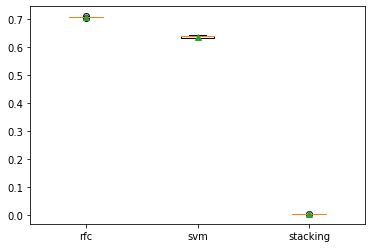

In [2]:
tokenizer = CustomTokenizer()
modelBuilder = ModelBuilder()
tfidf_vect = modelBuilder.GetVectorizer()
tfidf_trans = TfidfTransformer(sublinear_tf=True)
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
models

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, balanced_accuracy_score
pred_svm = pipeline.predict(X_test)
accuracy = balanced_accuracy_score(y,pred)    
print('balanced_accuracy_score: ' + str(round(accuracy,2)))   

NameError: name 'pipeline' is not defined